In [18]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Download latest version
path = kagglehub.dataset_download("crawford/emnist")

print("Path to dataset files:", path)

Path to dataset files: /Users/bazos/.cache/kagglehub/datasets/crawford/emnist/versions/3


# Importing 'By_Class' Dataset

The 'By_Class' dataset contains all the digit classes and letter classes with merging of classes, and uneven data.

In [9]:
by_class_train = pd.read_csv(path + "/emnist-byclass-train.csv", header=None)
by_class_test = pd.read_csv(path + "/emnist-byclass-test.csv", header=None)
by_class_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Make a dictionary for all values
labels = {}
with open(path+"/emnist-byclass-mapping.txt", "r") as f:
    for line in f:
        label, ascii_code = map(int, line.strip().split())
        labels[label] = chr(ascii_code)

In [10]:
# Need to add columns
by_class_train.columns = ["label"] + [str(i) for i in range(1, 785)]
by_class_test.columns = ["label"] + [str(i) for i in range(1, 785)]

by_class_train.head()

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Split into X and y
by_class_X_train, by_class_y_train = by_class_train.drop(['label'], axis=1).to_numpy(), by_class_train[['label']].to_numpy()
by_class_X_test, by_class_y_test = by_class_test.drop(['label'], axis=1).to_numpy(), by_class_test[['label']].to_numpy()

Image is 4


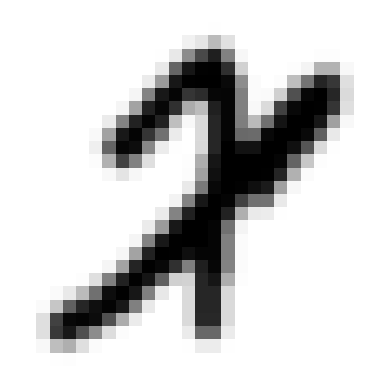

In [ ]:
def plot_img(img):
    image = img.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")


sample_row = by_class_train.sample()
label, image_data = sample_row["label"].values[0], sample_row.drop(
    ["label"], axis=1).values[0]
plot_img(image_data)
print("Image is", labels[label])
plt.show()

Image seems to be rotated

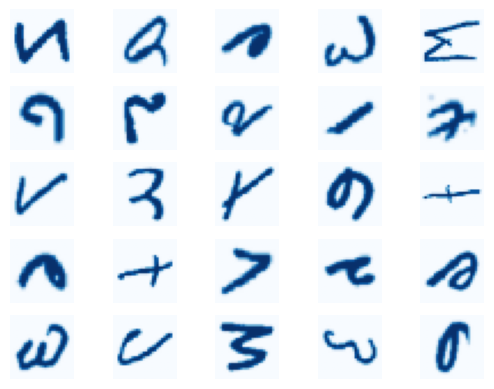

In [ ]:
def plot_digits(data, row_size=5):
    for i in range(len(data)):
        ax = plt.subplot(row_size, row_size, i+1)

        digit = data[i]
        digit_image = digit.reshape(28, 28)

        plt.imshow(digit_image, cmap=plt.cm.Blues)
        plt.axis("off")


plot_digits(by_class_X_train[:25])

In [ ]:
# Images rotated and flipped

# Training a binary classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

by_class_7_train = [by]